<a href="https://colab.research.google.com/github/shilpeemaitra/Lab/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import numpy as np

Loading Dataset

In [3]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No Missing Values

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


NO duplicate values




In [9]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


In [11]:
df.rename(columns={"Edfited":"Churned"},inplace=True)

In [12]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [13]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [22]:
import seaborn as sns
import matplotlib.pyplot as mtp

In [23]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

visualising customer churned by gender

In [45]:
def countplot(column):
    mtp.figure(figsize=(10,3))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set1")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=10)

    mtp.title(f"Customer Churned by {column}",fontweight="black",size=10,pad=10)
    mtp.show()

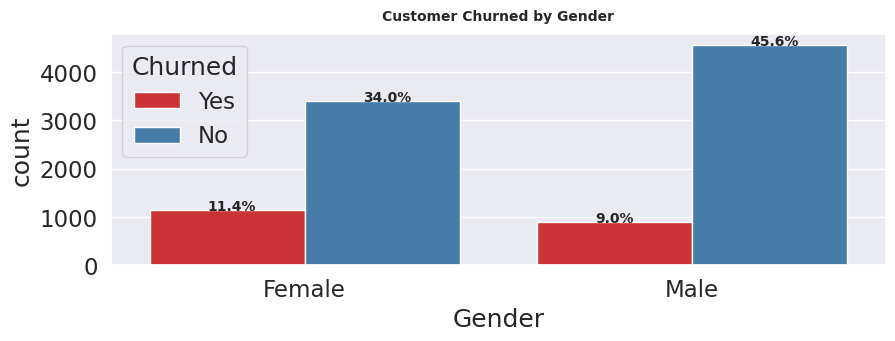

In [46]:
countplot("Gender")

Visualising customer churned by geography

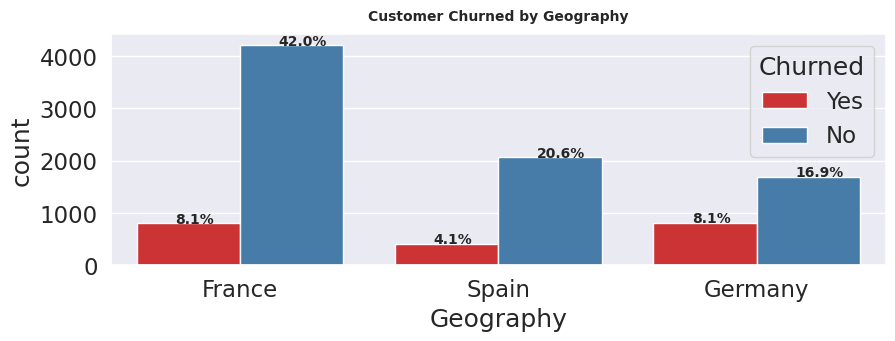

In [49]:
countplot("Geography")

Visualising customer by hascrcard

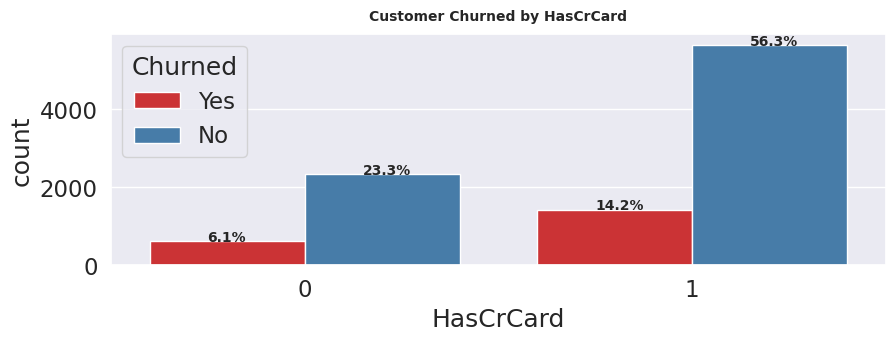

In [51]:
countplot("HasCrCard")

 Visualizing Customer Churned by "NumOfProducts".

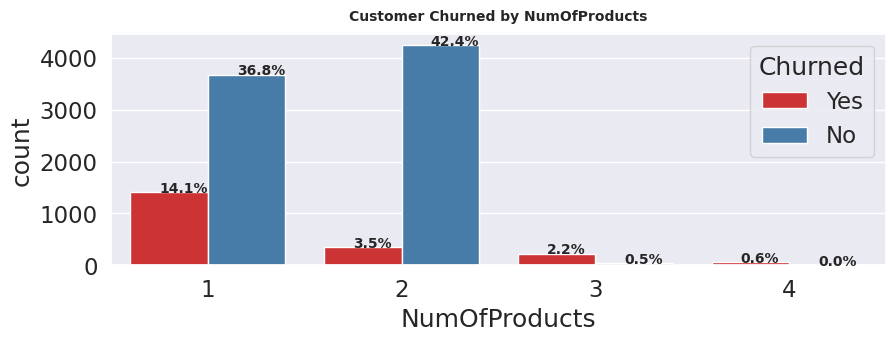

In [52]:
countplot("NumOfProducts")

visualising customer by 'IsActiveMember'

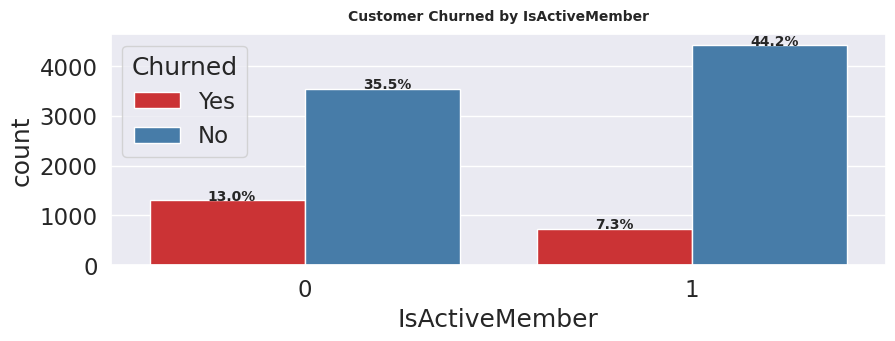

In [54]:
  countplot("IsActiveMember")

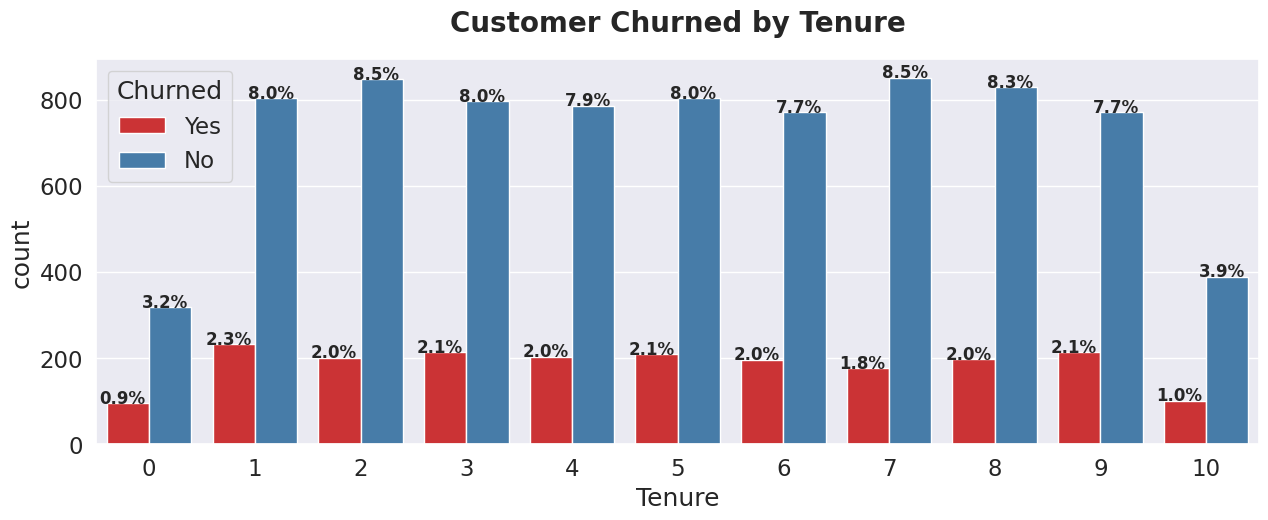

In [56]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set1")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [58]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


Data Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[-0.32733113 -0.90188624 -1.09598752 ...  0.97024255  0.02403506
   1.97716468]
 [-0.44133106  1.51506738 -1.09598752 ...  0.97024255  0.2218479
  -0.50577476]
 [-1.53987591 -0.90188624 -1.09598752 ... -1.03067011  0.2454053
   1.97716468]
 ...
 [ 0.60539563 -0.90188624 -1.09598752 ...  0.97024255 -1.01734044
   1.97716468]
 [ 1.25830436  0.30659057  0.91241915 ... -1.03067011 -0.1245844
   1.97716468]
 [ 1.46557697 -0.90188624 -1.09598752 ... -1.03067011 -1.08108398
  -0.50577476]]


PCA - Principal Component Analysis

Dimentionality Reduction

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [71]:
print(pca.explained_variance_)


[8334038.68992262 4515676.34736949]


In [78]:
df_new = pca.inverse_transform(df_pca)

In [77]:
pca = PCA(n_components=1)
pca.fit(df)
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)

original shape:    (10000, 11)
transformed shape: (10000, 1)


Class imbalance

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smt = SMOTE(random_state=42)

In [85]:
X = df.drop(columns=["Churned"])
y = df["Churned"]


In [89]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 10) (12736,)


In [91]:
y_train_resampled.value_counts().to_frame()

,Churned
0,6368
1,6368
